<a href="https://colab.research.google.com/github/Pranavvr/Image_Classification_Sifar100/blob/main/Image_Classification_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.utils import to_categorical
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [ ]:
#Reading the CIFAR100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

169001437/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
image_height, image_width, num_channels = X_train.shape[1:]

#Initializing the number of classes
num_classes = 100

print("CIFAR-100 Dataset Description:")
print("Number of Training Images:", X_train.shape)
print("Number of Test Images:", X_test.shape)
print("Image Dimensions:", image_height, "x", image_width, "pixels")
print("Number of Color Channels:", num_channels)
print("Number of Classes:", num_classes)

CIFAR-100 Dataset Description:
Number of Training Images: (50000, 32, 32, 3)
Number of Test Images: (10000, 32, 32, 3)
Image Dimensions: 32 x 32 pixels
Number of Color Channels: 3
Number of Classes: 100


In [ ]:
img_plot = X_train[:25]

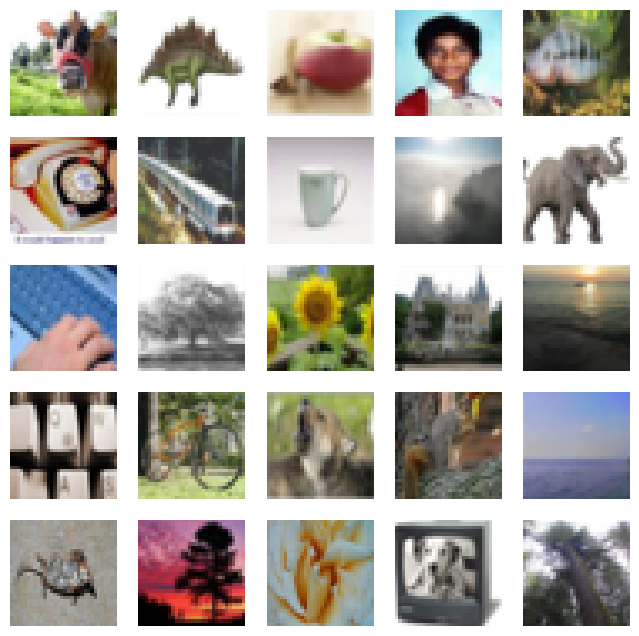

In [ ]:
#Plotting samples from the data
plt.figure(figsize=(8, 8))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(img_plot[i])
    plt.axis('off')
plt.show()

In [ ]:
#Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
#Converting the target labels into vectors
y_train_scaled = to_categorical(y_train, num_classes)
y_test_scaled = to_categorical(y_test, num_classes)

### 1. CONVOLUTIONAL NEURAL NETWORKS

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
#Training the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=64, validation_data = (X_test_scaled, y_test_scaled))

Epoch 1/25
782/782 [==============================] - 15s 10ms/step - loss: 3.8948 - accuracy: 0.1069 - val_loss: 3.3474 - val_accuracy: 0.1897
Epoch 2/25
782/782 [==============================] - 6s 8ms/step - loss: 3.2887 - accuracy: 0.1979 - val_loss: 3.0677 - val_accuracy: 0.2367
Epoch 3/25
782/782 [==============================] - 7s 9ms/step - loss: 2.9798 - accuracy: 0.2571 - val_loss: 2.7415 - val_accuracy: 0.2996
Epoch 4/25
782/782 [==============================] - 6s 8ms/step - loss: 2.7754 - accuracy: 0.3004 - val_loss: 2.6857 - val_accuracy: 0.3135
Epoch 5/25
782/782 [==============================] - 7s 9ms/step - loss: 2.6216 - accuracy: 0.3311 - val_loss: 2.5716 - val_accuracy: 0.3433
Epoch 6/25
782/782 [==============================] - 6s 8ms/step - loss: 2.4972 - accuracy: 0.3550 - val_loss: 2.5387 - val_accuracy: 0.3582
Epoch 7/25
782/782 [==============================] - 7s 8ms/step - loss: 2.3932 - accuracy: 0.3820 - val_loss: 2.7736 - val_accuracy: 0.3183
Epoc

In [ ]:
#Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_scaled, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)

#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Training Accuracy: 0.660260021686554
Training Loss: 1.1566678285598755
Test Accuracy: 0.4465000033378601
Test Loss: 2.278104782104492


In [ ]:
#Predict the model
y_pred = model.predict(X_test_scaled)

y_pred_1 = y_pred.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


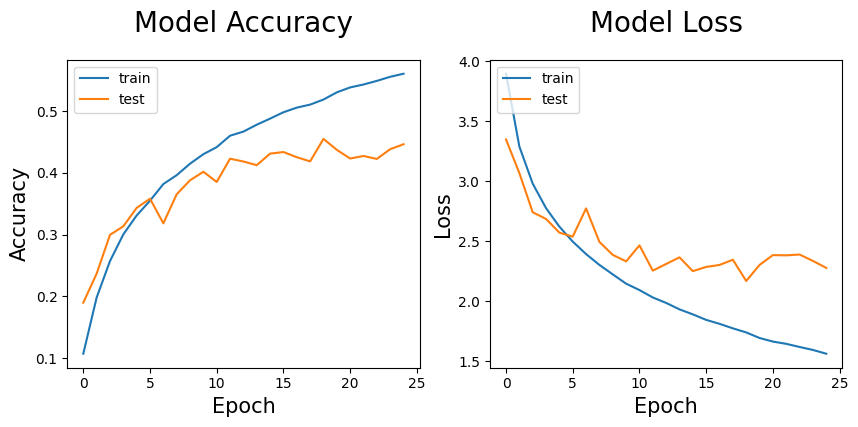

In [ ]:
plt.figure(figsize=[10,4])

#Train and test accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=20, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


#Train and test loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=20, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

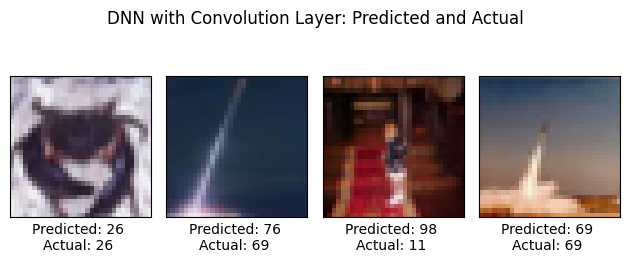

In [ ]:
#Plotting from the predictions
random_indices = random.sample(range(len(X_test_scaled)), 4)

for i, idx in enumerate(random_indices):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_scaled[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    predicted_label = y_pred_1[idx]
    true_label = np.argmax(y_test_scaled[idx])
    plt.xlabel("Predicted: {} \nActual: {} ".format(predicted_label, true_label))
    plt.suptitle('DNN with Convolution Layer: Predicted and Actual')
    plt.tight_layout()

plt.show()

### 2. DNN WITHOUT CONVOLUTIONAL LAYERS

In [ ]:
#Create a Sequential model
model = Sequential([
    Flatten(input_shape = (32, 32, 3)),

    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),

    Dense(100, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 100)               12900     
                                                                 
Total params: 1750500 (6.68 MB)
Trainable params: 1750500 (6.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=64, validation_data = (X_test_scaled, y_test_scaled))

Epoch 1/25
782/782 [==============================] - 5s 5ms/step - loss: 4.1359 - accuracy: 0.0652 - val_loss: 3.8574 - val_accuracy: 0.1133
Epoch 2/25
782/782 [==============================] - 4s 5ms/step - loss: 3.7263 - accuracy: 0.1265 - val_loss: 3.6722 - val_accuracy: 0.1376
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 3.5534 - accuracy: 0.1569 - val_loss: 3.6313 - val_accuracy: 0.1477
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 3.4408 - accuracy: 0.1773 - val_loss: 3.4607 - val_accuracy: 0.1838
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 3.3511 - accuracy: 0.1930 - val_loss: 3.4356 - val_accuracy: 0.1815
Epoch 6/25
782/782 [==============================] - 4s 6ms/step - loss: 3.2814 - accuracy: 0.2059 - val_loss: 3.3862 - val_accuracy: 0.1931
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 3.2225 - accuracy: 0.2160 - val_loss: 3.3363 - val_accuracy: 0.2057
Epoch 

In [ ]:
#Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_scaled, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)

#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Training Accuracy: 0.3449999988079071
Training Loss: 2.55072021484375
Test Accuracy: 0.2313999980688095
Test Loss: 3.4102001190185547


In [ ]:
#Predict the model
y_pred = model.predict(X_test_scaled)

y_pred_1 = y_pred.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


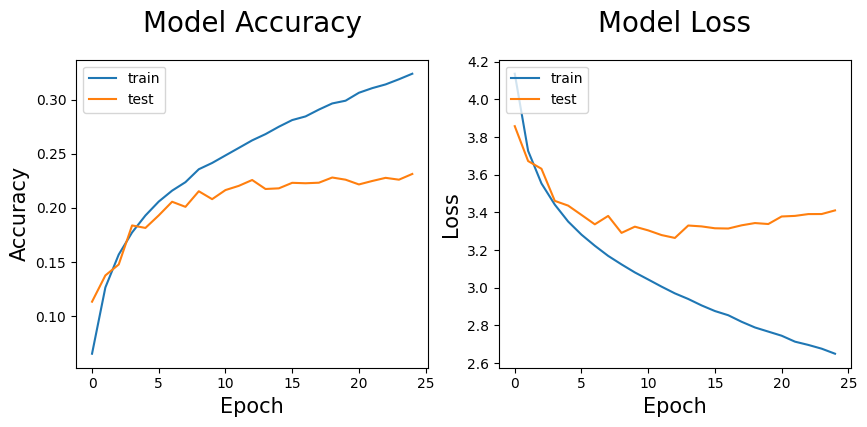

In [ ]:
plt.figure(figsize=[10,4])

#Train and test accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=20, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

#Train and test loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=20, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

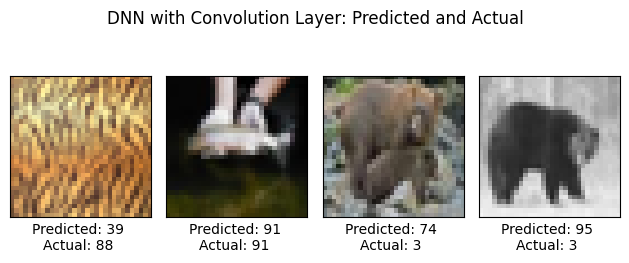

In [ ]:
#Plotting from the predictions
random_indices = random.sample(range(len(X_test_scaled)), 4)

for i, idx in enumerate(random_indices):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_scaled[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    predicted_label = y_pred_1[idx]
    true_label = np.argmax(y_test_scaled[idx])
    plt.xlabel("Predicted: {} \nActual: {} ".format(predicted_label, true_label))
    plt.suptitle('DNN with Convolution Layer: Predicted and Actual')
    plt.tight_layout()

plt.show()